In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [5]:

#Most frequent 5000 words in the dataset
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [6]:
articles = []
labelsList = []

#raw_data = pd.read_csv('/content/drive/My Drive/new_transaction.csv')

with open("isear.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labelsList.append(row[0])
        article = row[0]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labelsList))
print(len(articles))

7666
7666


In [23]:

#read the first dataset
import pandas as pd

data = pd.read_csv("isear.csv", delimiter="|" , error_bad_lines=False)

df2 = data.loc[:,'Field1':'SIT']
df2 = df2.drop(['Field3', 'Field2', 'MYKEY'], axis = 1)
#df2.head()

emotion_list = df2['Field1'].tolist()
sentence_list = df2['SIT'].tolist()
#Field1 to emotionlist, SIT to sentenceList, 

print(len(sentence_list))
#articless = []

# for each sentence in sentence list, I wnat to check if it contains a stopword, if yes replace the word with ' '
#for sentence in sentence_list:
 #   for word in STOPWORDS:
  #      token = ' ' + word + ' '
   #     sentence = sentence.replace(token, ' ')
    #    sentence = sentence.replace(' ', ' ')
    #sentence_list.append(sentence) 

#print(len(sentence_list))

print(sentence_list[0:3])

7503
['During the period of falling in love, each time that we met and á especially when we had not met for a long time.', 'When I was involved in a traffic accident.', 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.']


b'Skipping line 199: expected 43 fields, saw 44\nSkipping line 222: expected 43 fields, saw 44\nSkipping line 248: expected 43 fields, saw 44\nSkipping line 350: expected 43 fields, saw 44\nSkipping line 395: expected 43 fields, saw 44\nSkipping line 423: expected 43 fields, saw 44\nSkipping line 480: expected 43 fields, saw 44\nSkipping line 552: expected 43 fields, saw 44\nSkipping line 601: expected 43 fields, saw 45\nSkipping line 604: expected 43 fields, saw 45\nSkipping line 612: expected 43 fields, saw 45\nSkipping line 722: expected 43 fields, saw 44\nSkipping line 765: expected 43 fields, saw 44\nSkipping line 800: expected 43 fields, saw 46\nSkipping line 818: expected 43 fields, saw 45\nSkipping line 891: expected 43 fields, saw 44\nSkipping line 928: expected 43 fields, saw 44\nSkipping line 963: expected 43 fields, saw 44\nSkipping line 965: expected 43 fields, saw 45\nSkipping line 974: expected 43 fields, saw 44\nSkipping line 985: expected 43 fields, saw 44\nSkipping li

In [38]:
#Read the second dataset

data2 = pd.read_csv("text_emotion.csv")
emotion_list2 = data2['sentiment'].tolist()
sentence_list2 = data2['content'].tolist()

emotion_list2_unique = data2['sentiment'].unique().tolist()
emotion_list2_unique


emotion_list.extend(emotion_list2)
sentence_list.extend(sentence_list2)
emotion_list2_unique

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [36]:
for word in STOPWORDS:
    token = ' ' + word + ' '
    res = list(map(lambda token: str.replace(token, ' ', ' '), sentence_list))
print(res[0:3])

['During the period of falling in love, each time that we met and á especially when we had not met for a long time.', 'When I was involved in a traffic accident.', 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.']


In [37]:
sentenceFiltered = []
for w in sentence_list:
    if w not in STOPWORDS:
        sentenceFiltered.append(w)
len(sentenceFiltered)

47503

In [39]:
print(emotion_list[0:10])

['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger']


In [13]:
data = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6, 'empty':7,
       'enthusiasm':8, 'neutral':9, 'worry':10, 'surprise':11, 'love':12, 'fun':13, 'hate':14, 'happiness':15,
       'boredom':16, 'relief':17}

xx = [data[item] for item in emotion_list]

print(xx)
labelsTensor1 = tf.Variable(xx, tf.int32)
ys1 = tf.one_hot(labelsTensor1, 18)
print(ys1)

print(data)

[0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(7503, 7), dtype=float32)
{'joy': 0, 'fear': 1, 'anger': 2, 'sadness': 3, 'disgust': 4, 'shame': 5, 'guilt': 6}


In [33]:
train_size = int(len(sentenceFiltered) * training_portion)



train_articles = sentenceFiltered[0: train_size]
train_labels = ys1[0: train_size]

validation_articles = sentenceFiltered[train_size:]
validation_labels = ys1[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

6002
6002
6002
1501
1501


In [15]:
print(validation_labels.shape)

(1501, 7)


In [16]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [17]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

1501
(1501, 200)


In [19]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

when my friends did not ask me to go to a new year's party á with them ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
When my friends did not ask me to go to a New Year's party á with them.


In [20]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 5 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 394,759
Trainable params: 394,759
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 6002 samples, validate on 1501 samples
Epoch 1/10
6002/6002 - 47s - loss: 1.8135 - accuracy: 0.2494 - val_loss: 1.6067 - val_accuracy: 0.3604
Epoch 2/10
6002/6002 - 39s - loss: 1.3000 - accuracy: 0.5110 - val_loss: 1.4331 - val_accuracy: 0.4524
Epoch 3/10
6002/6002 - 32s - loss: 0.9518 - accuracy: 0.6539 - val_loss: 1.4185 - val_accuracy: 0.4917
Epoch 4/10
6002/6002 - 39s - loss: 0.7402 - accuracy: 0.7428 - val_loss: 1.4613 - val_accuracy: 0.5170
Epoch 5/10
6002/6002 - 38s - loss: 0.5922 - accuracy: 0.7991 - val_loss: 1.6962 - val_accuracy: 0.5050
Epoch 6/10
6002/6002 - 37s - loss: 0.4817 - accuracy: 0.8399 - val_loss: 1.6762 - val_accuracy: 0.5123
Epoch 7/10
6002/6002 - 36s - loss: 0.4053 - accuracy: 0.8679 - val_loss: 1.8322 - val_accuracy: 0.5137
Epoch 8/10
6002/6002 - 49s - loss: 0.3471 - accuracy: 0.8870 - val_loss: 2.1522 - val_accuracy: 0.4857
Epoch 9/10
6002/6002 - 43s - loss: 0.3096 - accuracy: 0.8960 - val_loss: 2.2074 - val_accuracy: 0.4957
Epoch 10/10
6002/6002 - 3

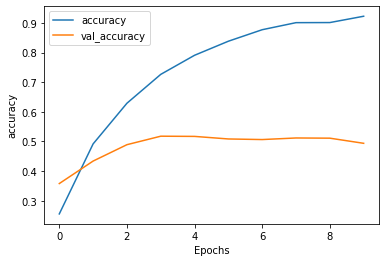

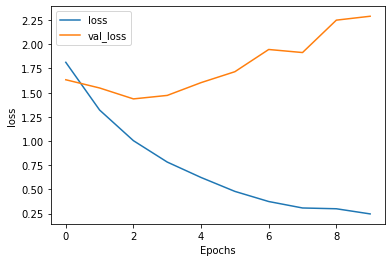

In [139]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [141]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
])


model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 175       
Total params: 321,735
Trainable params: 321,735
Non-trainable params: 0
_________________________________________________________________


In [143]:
num_epochs = 10
history2 = model2.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 6002 samples, validate on 1501 samples
Epoch 1/10
6002/6002 - 2s - loss: 0.3740 - accuracy: 0.8585 - val_loss: 0.3847 - val_accuracy: 0.8573
Epoch 2/10
6002/6002 - 2s - loss: 0.3658 - accuracy: 0.8594 - val_loss: 0.3801 - val_accuracy: 0.8588
Epoch 3/10
6002/6002 - 2s - loss: 0.3572 - accuracy: 0.8610 - val_loss: 0.3746 - val_accuracy: 0.8585
Epoch 4/10
6002/6002 - 2s - loss: 0.3482 - accuracy: 0.8623 - val_loss: 0.3683 - val_accuracy: 0.8596
Epoch 5/10
6002/6002 - 2s - loss: 0.3389 - accuracy: 0.8643 - val_loss: 0.3620 - val_accuracy: 0.8610
Epoch 6/10
6002/6002 - 2s - loss: 0.3295 - accuracy: 0.8667 - val_loss: 0.3562 - val_accuracy: 0.8638
Epoch 7/10
6002/6002 - 2s - loss: 0.3200 - accuracy: 0.8699 - val_loss: 0.3511 - val_accuracy: 0.8655
Epoch 8/10
6002/6002 - 2s - loss: 0.3098 - accuracy: 0.8745 - val_loss: 0.3455 - val_accuracy: 0.8690
Epoch 9/10
6002/6002 - 2s - loss: 0.2998 - accuracy: 0.8790 - val_loss: 0.3411 - val_accuracy: 0.8703
Epoch 10/10
6002/6002 - 2s - loss:

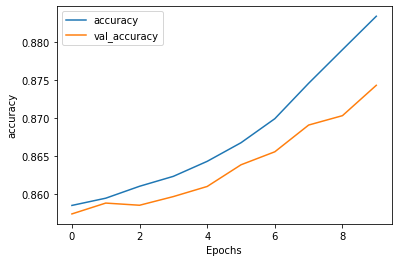

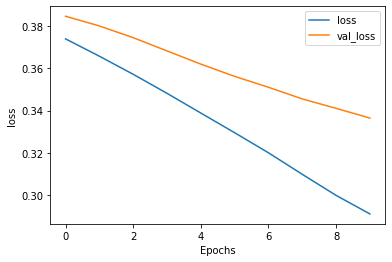

In [144]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [152]:
txt = ["I found her happy"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred2 = model2.predict(padded)
#labelss = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6 }
#Do I get the sequence that generates this?
new_data ={j:i for i, j in data.items()}
print(pred, new_data[int(pred.argmax(1))])
print(pred2, new_data[int(pred2.argmax(1))])

[[0.08345342 0.08538404 0.15749274 0.33673275 0.0826163  0.11017847
  0.14414234]] sadness
[[0.46875444 0.06977893 0.03012443 0.07516468 0.09282931 0.2154973
  0.11717109]] joy
